In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# from plotly.express import line
#import df
#import plotly.express as px
%matplotlib inline 
sns.set(style="ticks")
plt.style.use('ggplot')
pd.set_option('display.max_columns',24)
pd.set_option('display.max_colwidth',None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [64]:
encoding = 'windows-1250'
data=pd.read_csv(r'C:\Users\Dima\Desktop\Homework\3 курс\ТМО\ЛР2\archive\general_government_debt.csv', encoding = encoding)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 75 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ď»żcountry_name  87 non-null     object 
 1   indicator_name   87 non-null     object 
 2   1950             9 non-null      float64
 3   1951             9 non-null      float64
 4   1952             9 non-null      float64
 5   1953             9 non-null      float64
 6   1954             9 non-null      float64
 7   1955             10 non-null     float64
 8   1956             10 non-null     float64
 9   1957             10 non-null     float64
 10  1958             10 non-null     float64
 11  1959             10 non-null     float64
 12  1960             12 non-null     float64
 13  1961             12 non-null     float64
 14  1962             12 non-null     float64
 15  1963             12 non-null     float64
 16  1964             12 non-null     float64
 17  1965             1

In [65]:
data.shape

(87, 75)

In [66]:

input_df = data
# input_df.drop(columns=['indicator_name'], inplace=True)

result_df = data.T
result_df.columns = result_df.iloc[0]
result_df = result_df.iloc[1:]
result_df = result_df.tail(len(result_df)-1)
# result_df.columns = result_df.columns.str.replace('ď»ż', '')
result_df.head()

ď»żcountry_name,Albania,Australia,Austria,Belarus,Belgium,Bosnia and Herzegovina,Brazil,Bulgaria,Cambodia,Canada,Chile,"China, People's Republic of",...,Tanzania,Thailand,Turkmenistan,"TĂĽrkiye, Republic of",Ukraine,United Arab Emirates,United Kingdom,United States,Uzbekistan,Venezuela,Vietnam,Yemen
1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.7499,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,179.8503,83.1260,NaN,NaN,NaN,NaN
1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.5209,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,162.1383,72.9550,NaN,NaN,NaN,NaN
1952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0543,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,150.1098,72.5255,NaN,NaN,NaN,NaN
1953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.1925,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,140.8349,71.7532,NaN,NaN,NaN,NaN
1954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.2773,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,135.8064,73.5681,NaN,NaN,NaN,NaN


In [67]:
# проверим есть ли пропущенные значения
data.isnull().sum()

ď»żcountry_name     0
indicator_name      0
1950               78
1951               78
1952               78
                   ..
2018                0
2019                0
2020                0
2021                0
2022                0
Length: 75, dtype: int64

In [68]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 87


In [69]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((87, 75), (87, 12))

In [70]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((87, 75), (9, 75))

In [71]:
data.head()

,ď»żcountry_name,indicator_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,Annual average of general government debt (Percent of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.4126,62.1445,70.3911,71.9923,73.7163,73.3244,71.8948,69.4720,67.3677,75.9269,73.8778,67.5812
1,Australia,Annual average of general government debt (Percent of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.0473,27.5339,30.4848,34.0455,37.7517,40.5935,41.1808,41.7625,46.7440,57.1150,57.5756,55.7018
2,Austria,Annual average of general government debt (Percent of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.1782,81.6609,81.0113,83.7579,84.4011,82.5486,78.6035,74.0738,70.6397,82.9300,82.2758,77.7864
3,Belarus,Annual average of general government debt (Percent of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.2233,36.9462,36.8595,38.7906,53.0069,53.4816,53.1598,47.5152,40.9992,47.4933,41.1820,39.7527
4,Belgium,Annual average of general government debt (Percent of GDP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.4947,104.8105,105.4856,107.0409,105.2304,105.0053,102.0202,99.8544,97.6172,112.0354,109.1927,105.2704


In [72]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,ď»żcountry_name,indicator_name,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Albania,Annual average of general government debt (Percent of GDP),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,59.4126,62.1445,70.3911,71.9923,73.7163,73.3244,71.8948,69.4720,67.3677,75.9269,73.8778,67.5812
1,Australia,Annual average of general government debt (Percent of GDP),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,24.0473,27.5339,30.4848,34.0455,37.7517,40.5935,41.1808,41.7625,46.7440,57.1150,57.5756,55.7018
2,Austria,Annual average of general government debt (Percent of GDP),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,82.1782,81.6609,81.0113,83.7579,84.4011,82.5486,78.6035,74.0738,70.6397,82.9300,82.2758,77.7864
3,Belarus,Annual average of general government debt (Percent of GDP),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,58.2233,36.9462,36.8595,38.7906,53.0069,53.4816,53.1598,47.5152,40.9992,47.4933,41.1820,39.7527
4,Belgium,Annual average of general government debt (Percent of GDP),0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,103.4947,104.8105,105.4856,107.0409,105.2304,105.0053,102.0202,99.8544,97.6172,112.0354,109.1927,105.2704


"Внедрение значений" - импьютация (imputation)
Обработка пропусков в числовых данных

In [73]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1950. Тип данных float64. Количество пустых значений 78, 89.66%.
Колонка 1951. Тип данных float64. Количество пустых значений 78, 89.66%.
Колонка 1952. Тип данных float64. Количество пустых значений 78, 89.66%.
Колонка 1953. Тип данных float64. Количество пустых значений 78, 89.66%.
Колонка 1954. Тип данных float64. Количество пустых значений 78, 89.66%.
Колонка 1955. Тип данных float64. Количество пустых значений 77, 88.51%.
Колонка 1956. Тип данных float64. Количество пустых значений 77, 88.51%.
Колонка 1957. Тип данных float64. Количество пустых значений 77, 88.51%.
Колонка 1958. Тип данных float64. Количество пустых значений 77, 88.51%.
Колонка 1959. Тип данных float64. Количество пустых значений 77, 88.51%.
Колонка 1960. Тип данных float64. Количество пустых значений 75, 86.21%.
Колонка 1961. Тип данных float64. Количество пустых значений 75, 86.21%.
Колонка 1962. Тип данных float64. Количество пустых значений 75, 86.21%.
Колонка 1963. Тип данных float64. Количество пустых

In [74]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.6128,64.0969,60.2446,57.4743,58.2034,56.6881,53.5503,55.1398,59.6665,57.7196,59.4126,62.1445
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,17.1208,15.0184,13.1886,11.9104,10.8664,9.9460,9.6712,11.7425,16.6227,20.3516,24.0473,27.5339
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66.3546,66.9778,64.8963,64.8487,68.3175,67.0007,64.7405,68.4174,79.5798,82.4177,82.1782,81.6609
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.2227,8.1151,12.2742,15.8132,20.2950,32.5468,36.8052,58.2233,36.9462
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,108.2168,105.4367,101.6593,97.1697,95.1419,91.4944,87.3246,93.1600,100.2168,100.2732,103.4947,104.8105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,83.1260,72.9550,72.5255,71.7532,73.5681,68.4986,64.7260,62.3295,64.9273,62.3359,60.8329,61.3934,...,53.1462,55.5379,58.6245,66.0953,65.4427,64.1781,64.5666,73.4168,86.5847,95.1435,99.4815,103.0432
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,44.8385,41.6329,31.4123,26.8771,21.0115,13.5385,9.5553,8.3332,7.3010,6.6095,6.3310,6.7566
84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.7289,48.1767,56.0290,41.7830,34.9129,25.6582,26.3644,20.3113,27.5736,37.7065,52.4760,58.4449
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.4202,27.7114,29.8352,29.3627,28.6691,30.2483,32.2095,31.0453,36.3484,36.8477,35.7772,38.3300


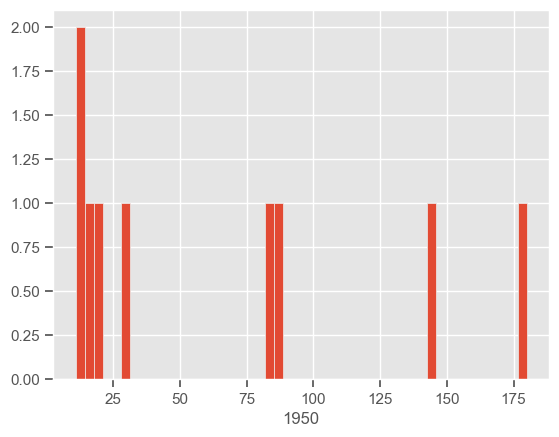

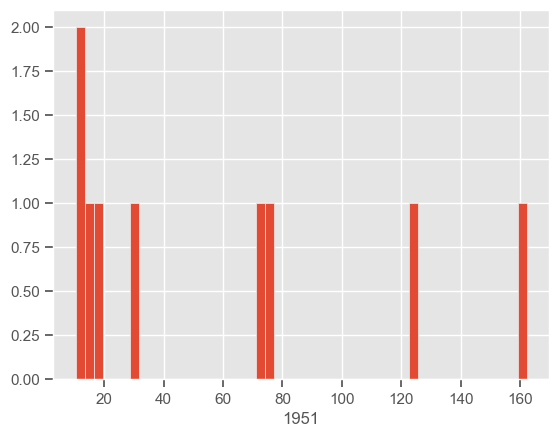

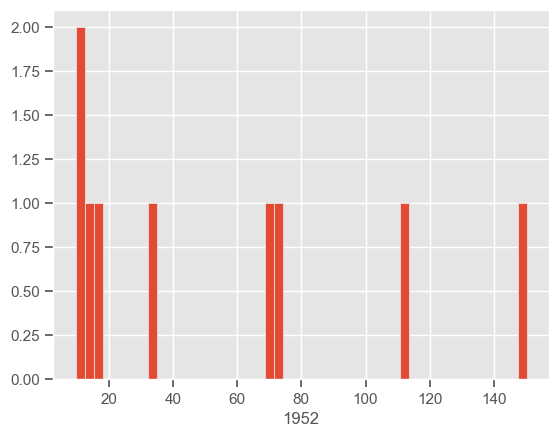

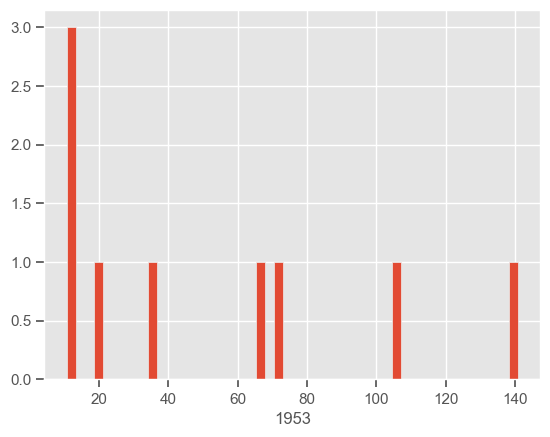

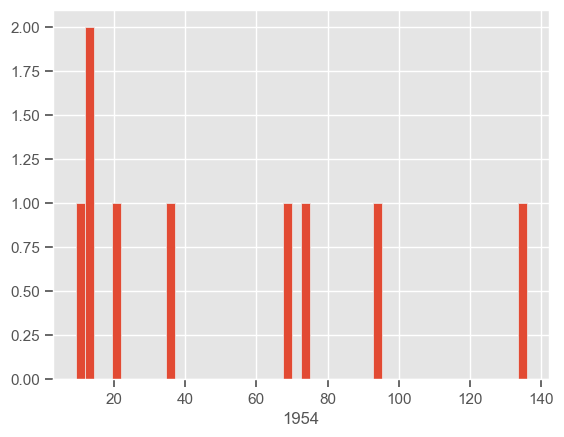

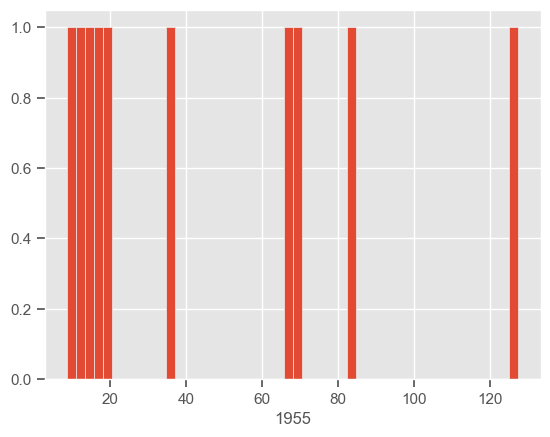

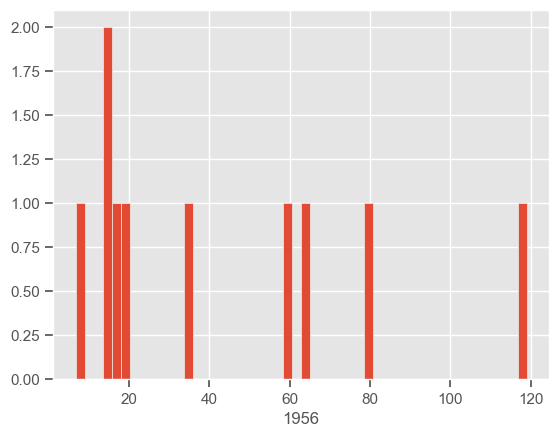

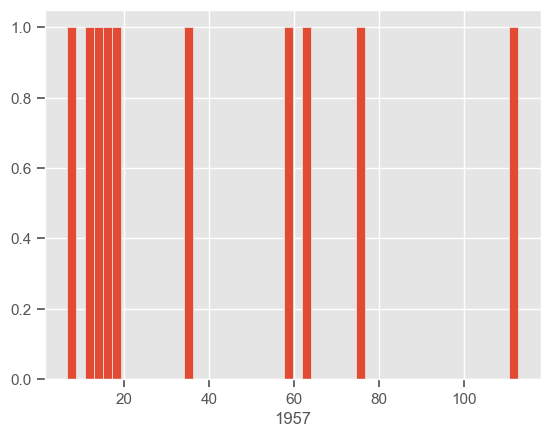

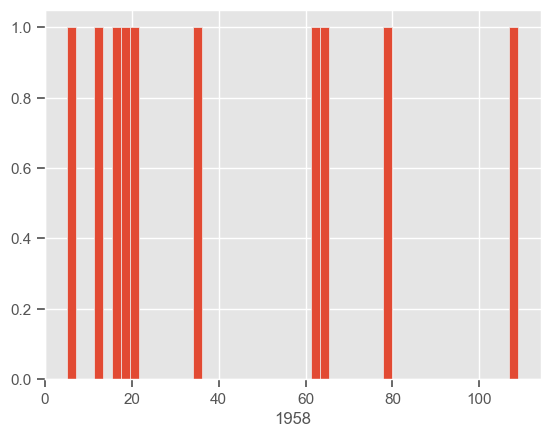

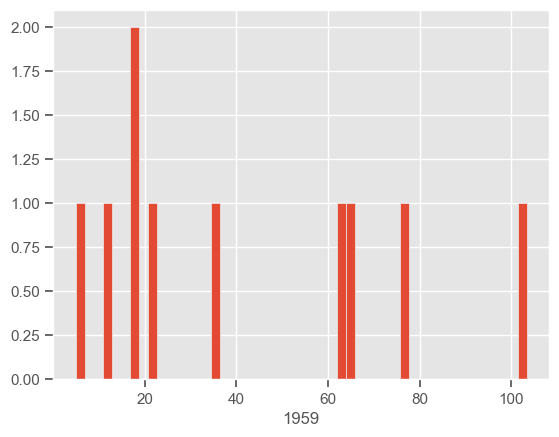

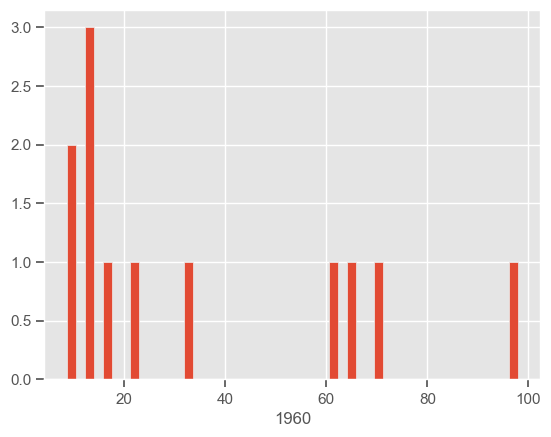

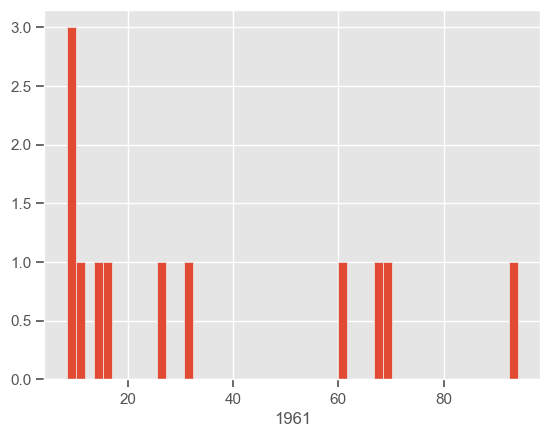

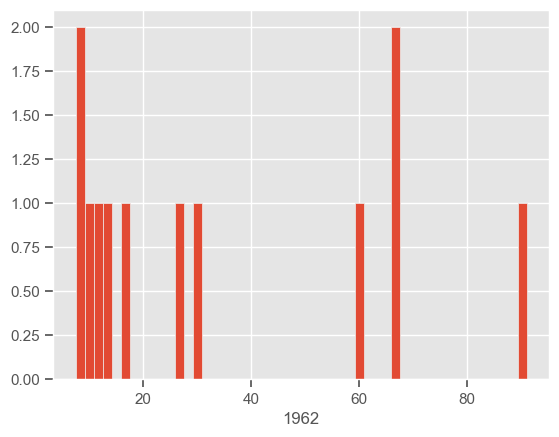

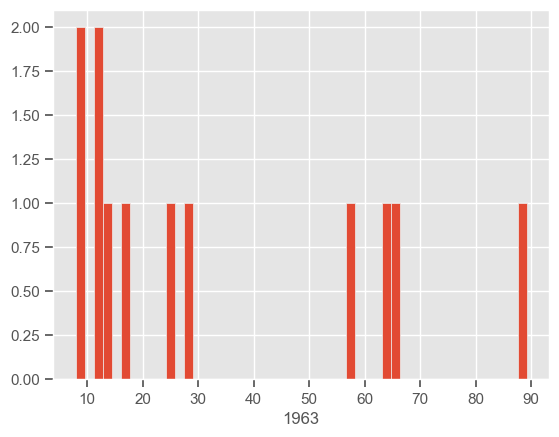

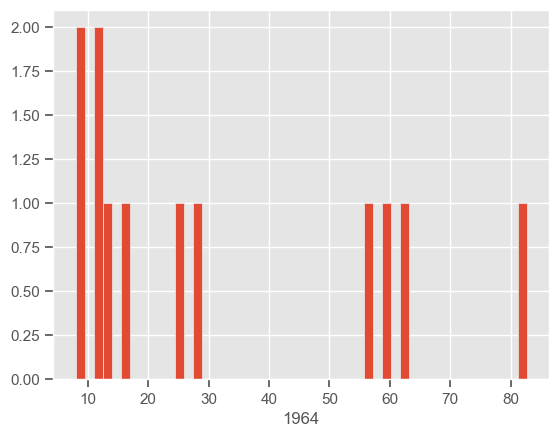

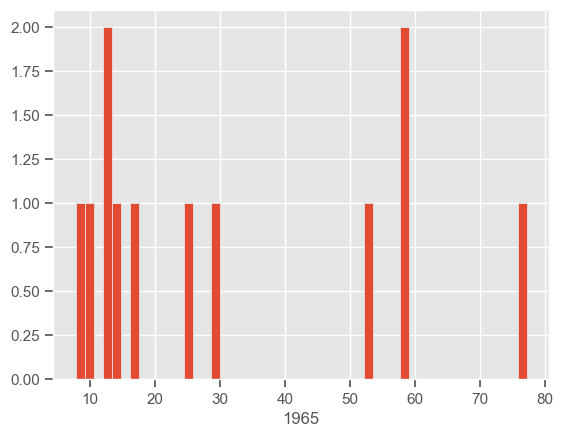

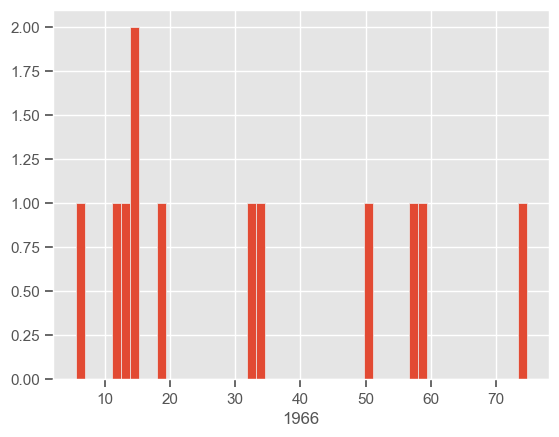

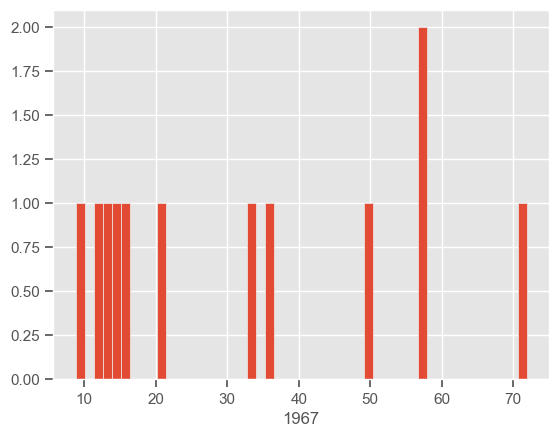

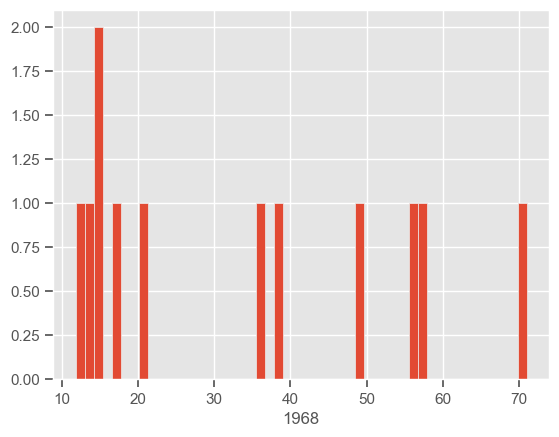

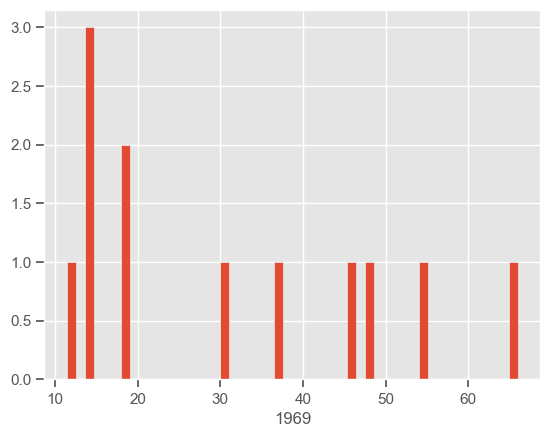

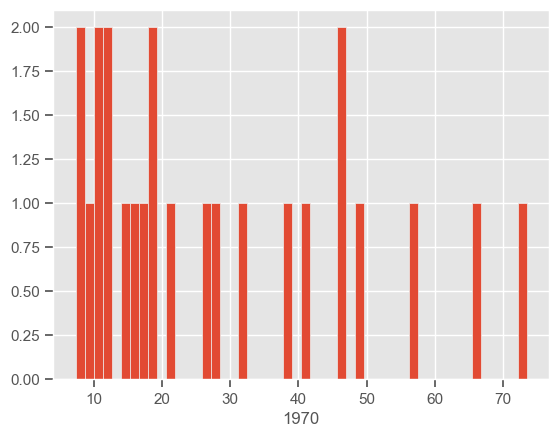

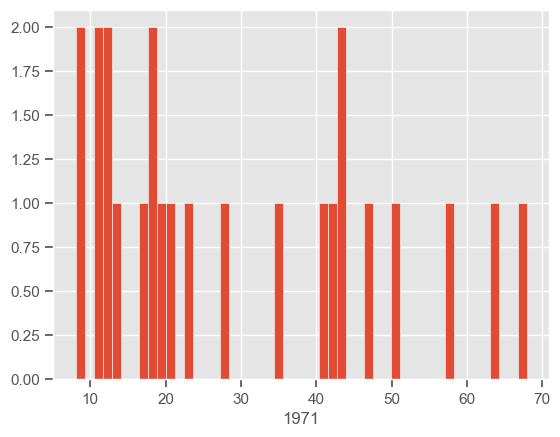

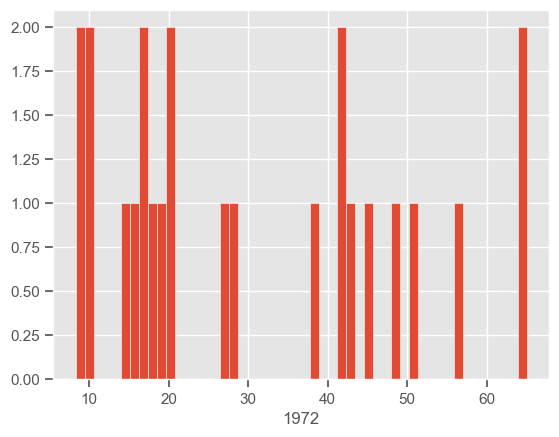

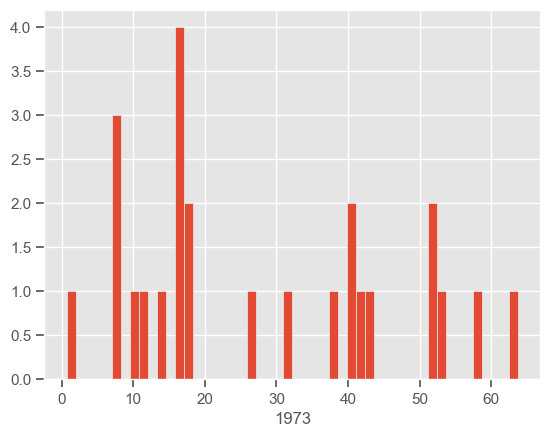

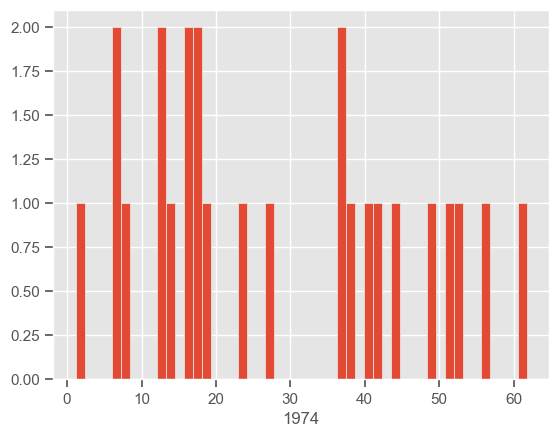

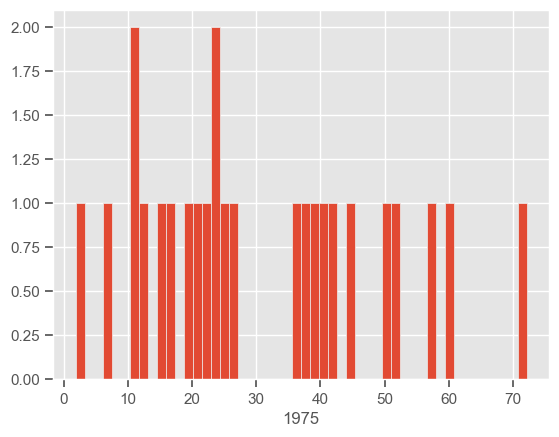

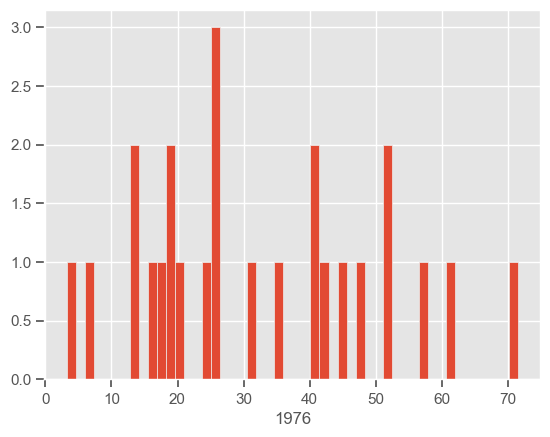

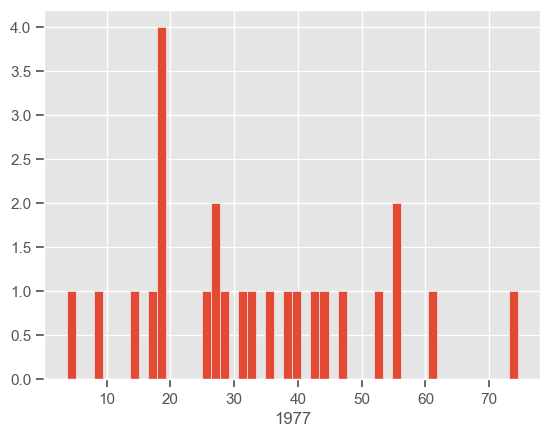

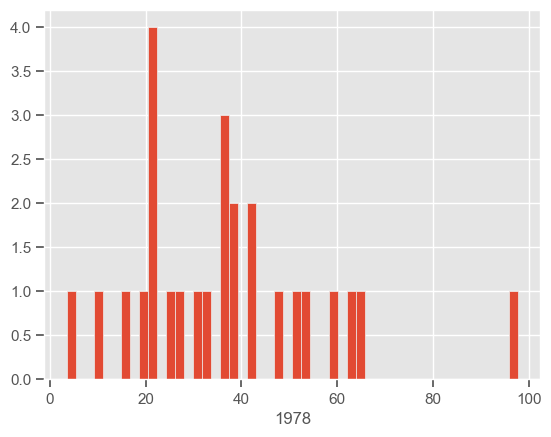

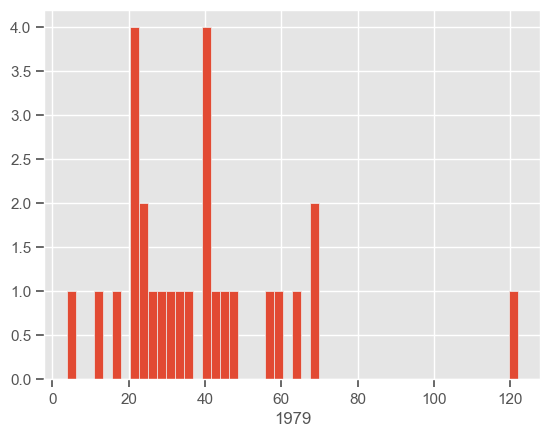

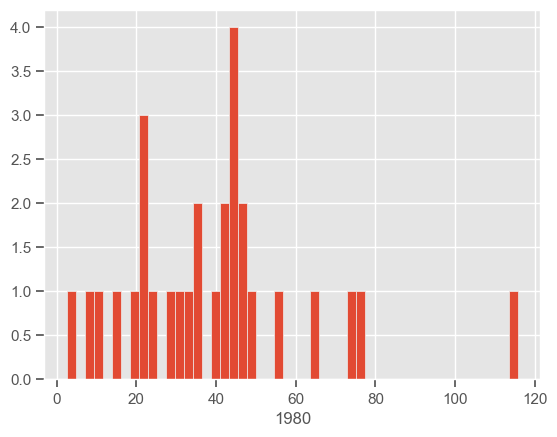

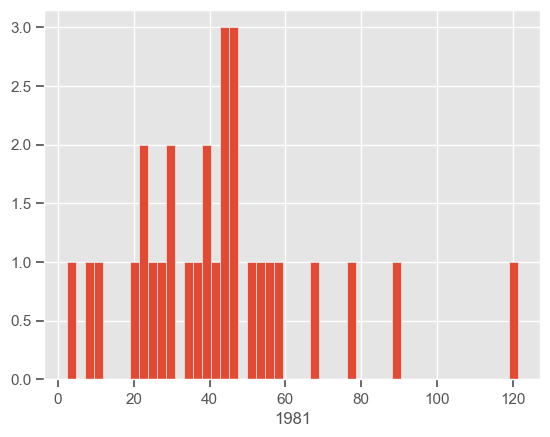

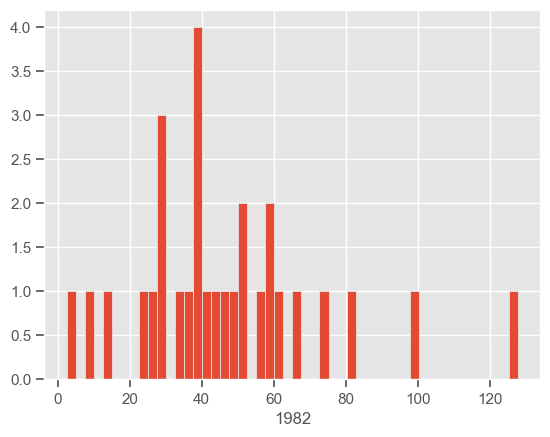

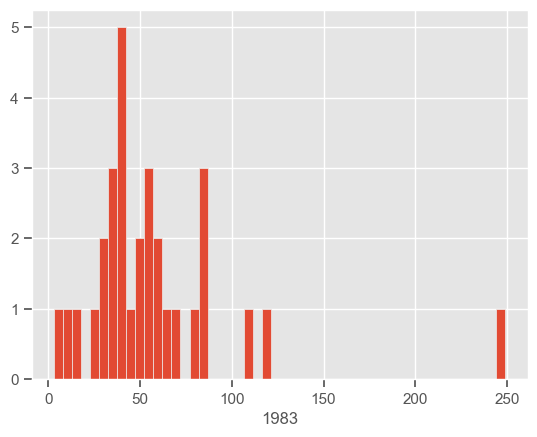

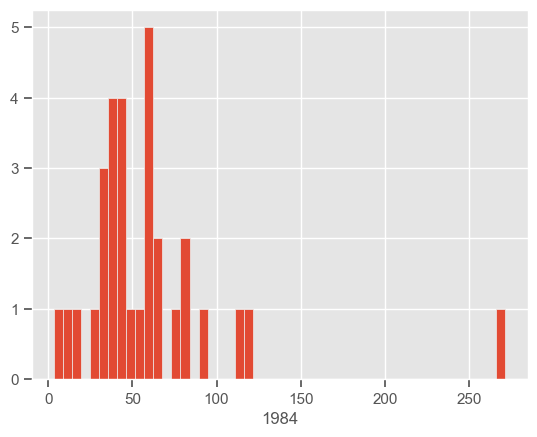

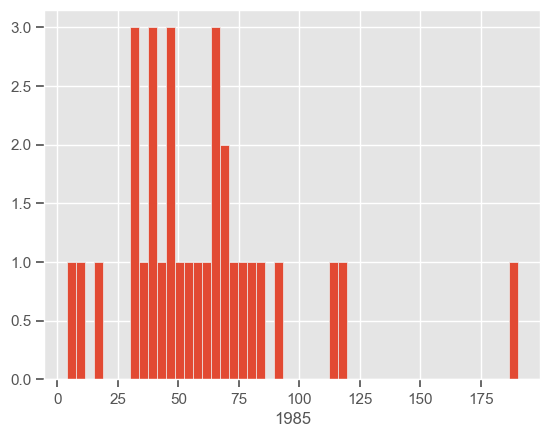

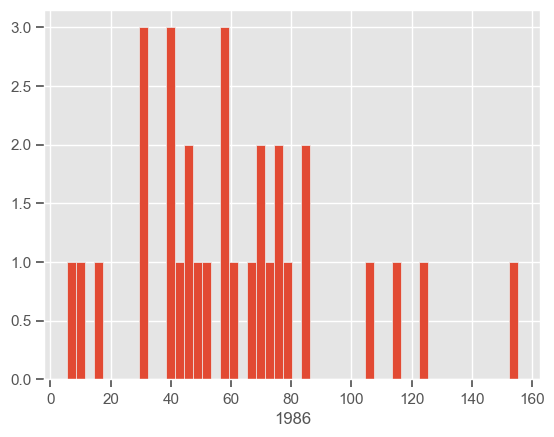

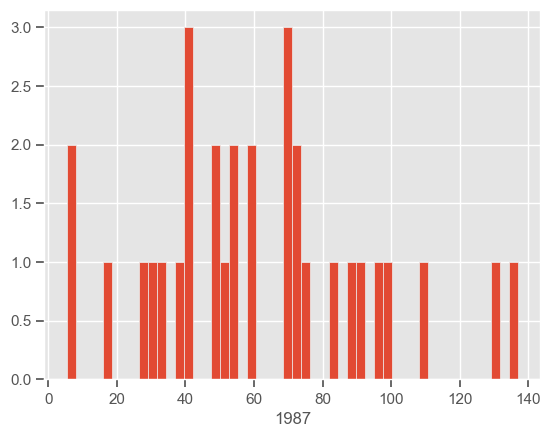

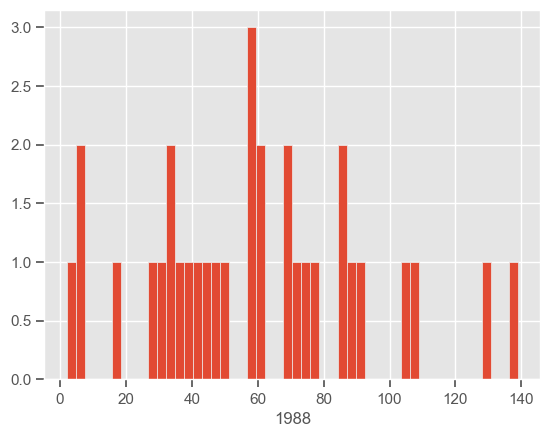

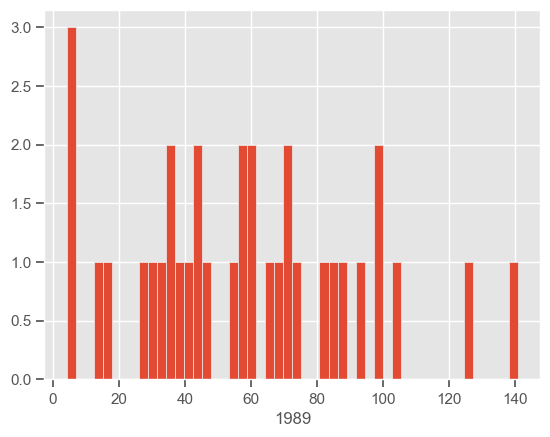

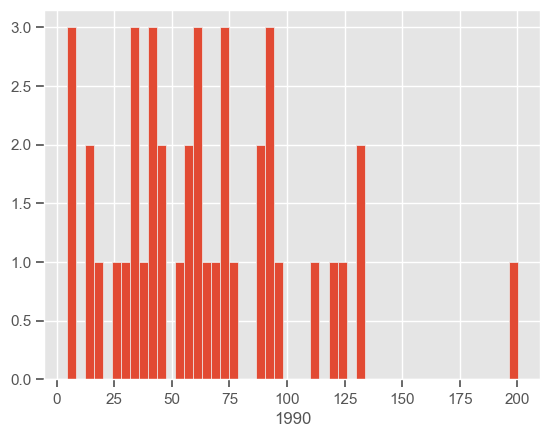

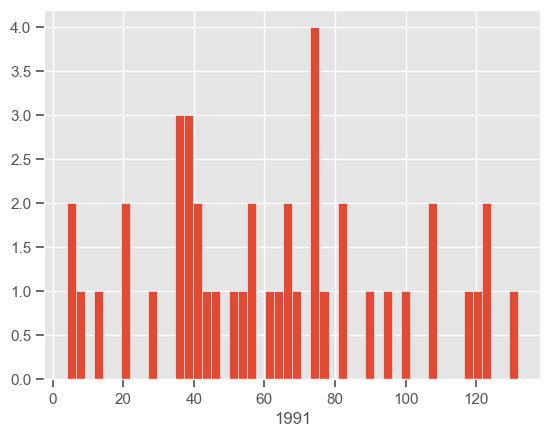

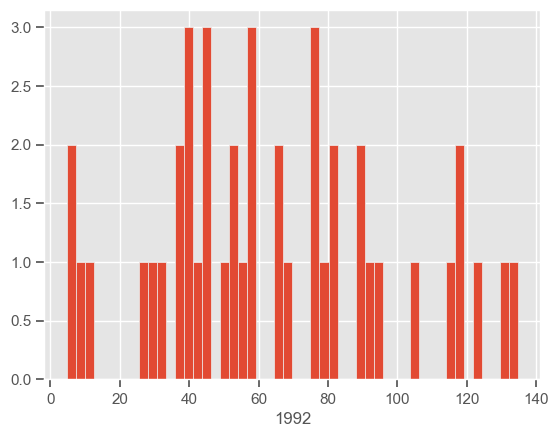

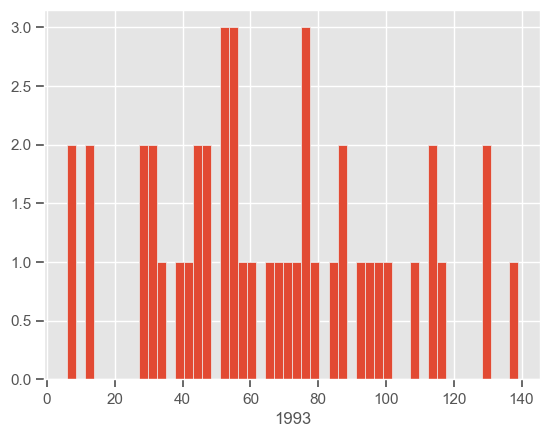

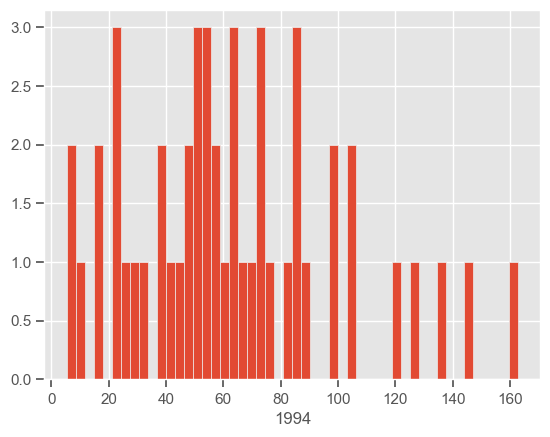

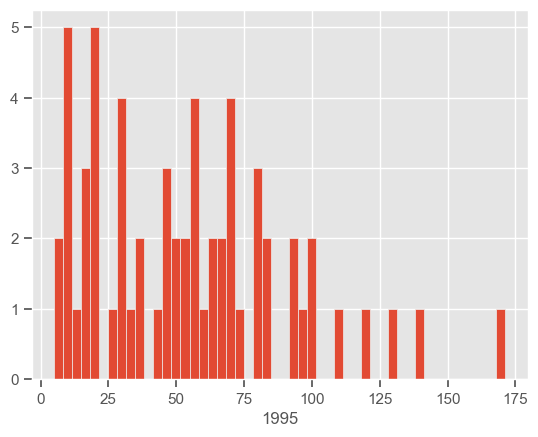

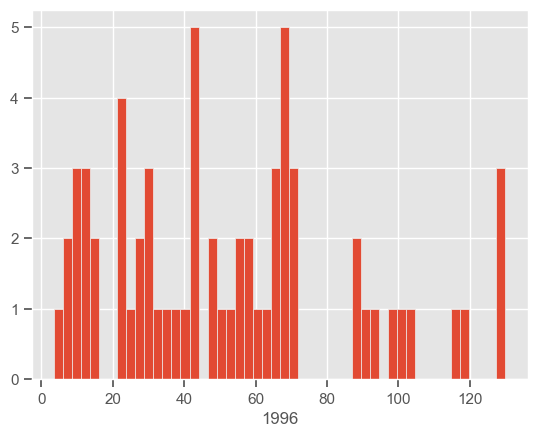

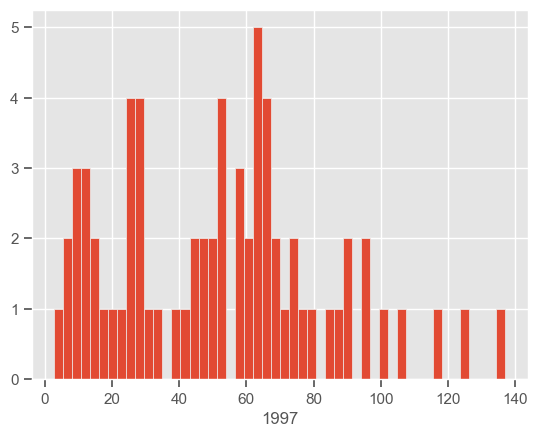

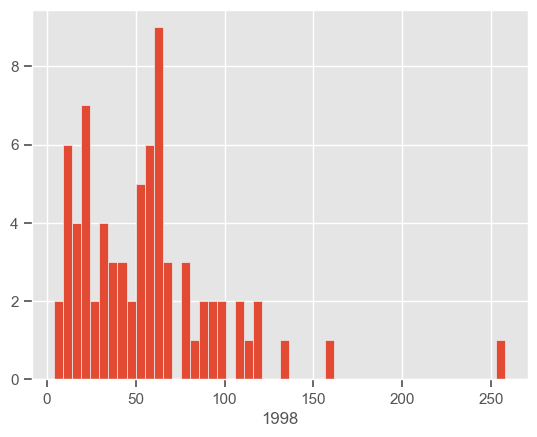

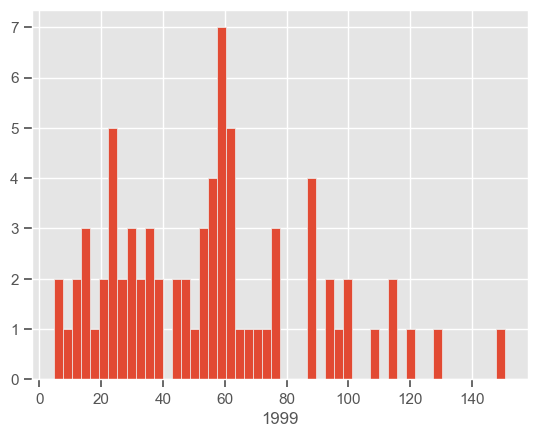

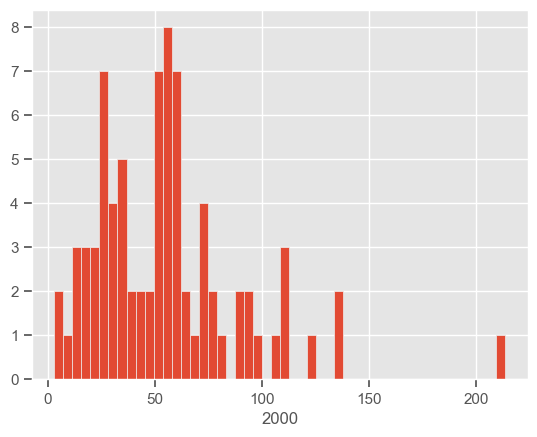

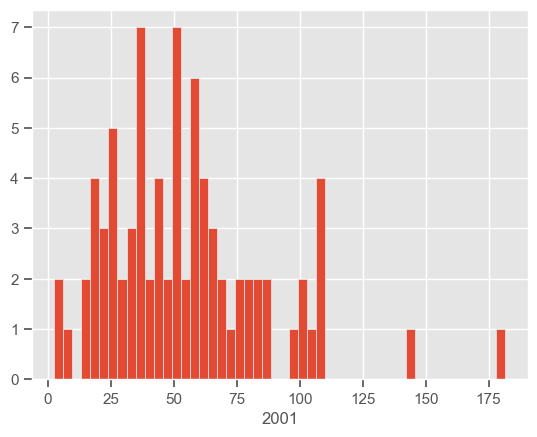

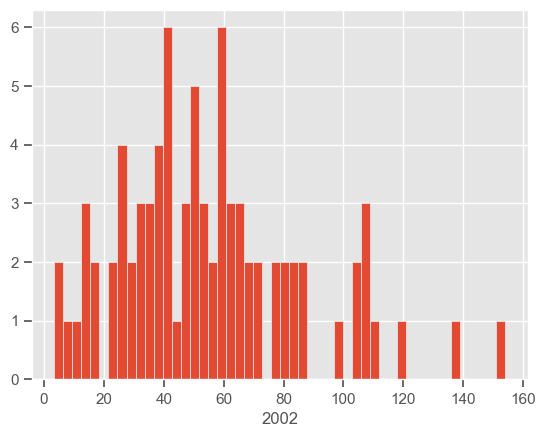

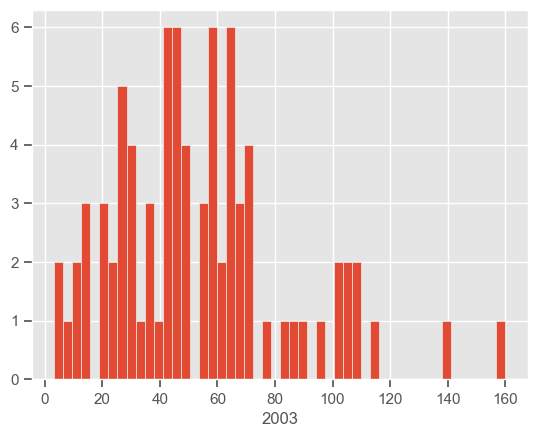

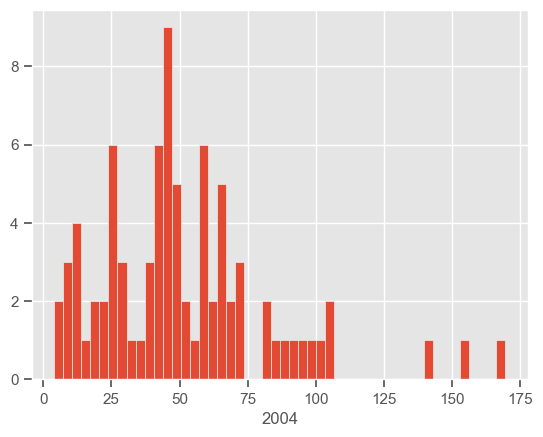

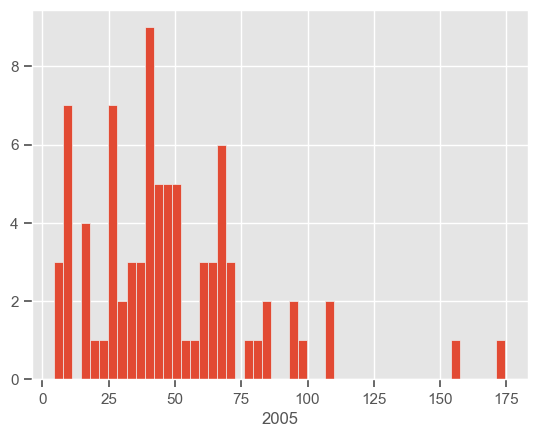

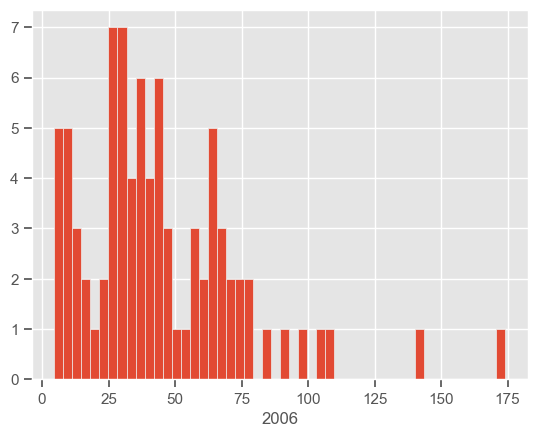

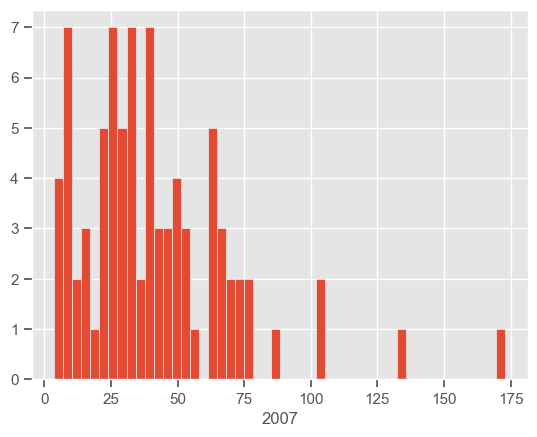

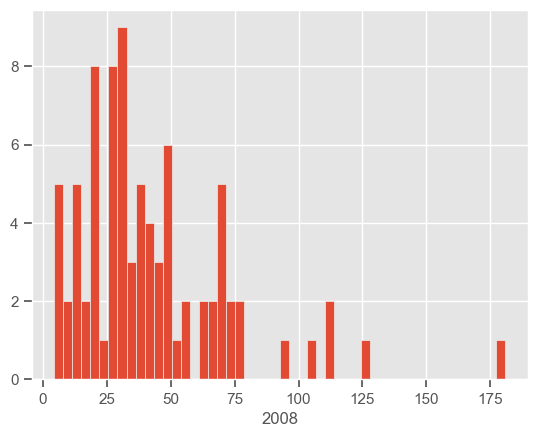

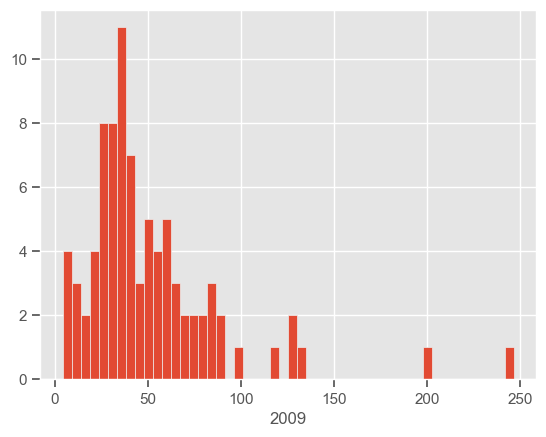

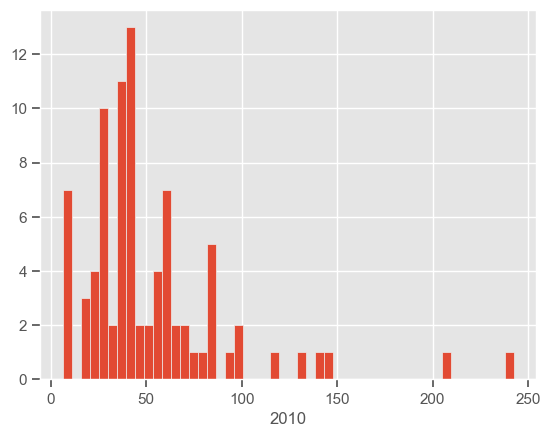

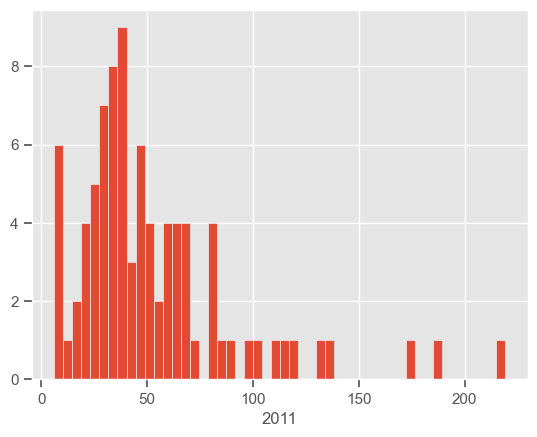

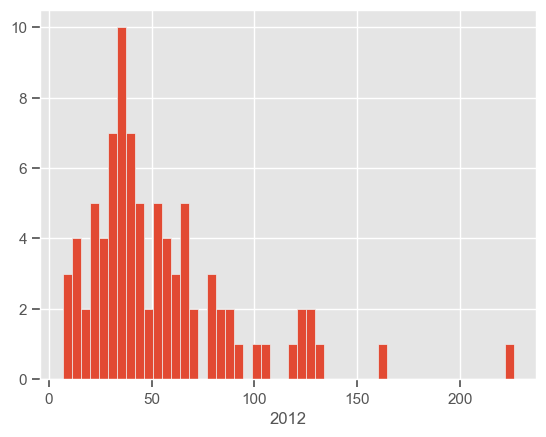

In [75]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [83]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_MasVnrArea)
mask_missing_values_only

NameError: name 'MissingIndicator' is not defined

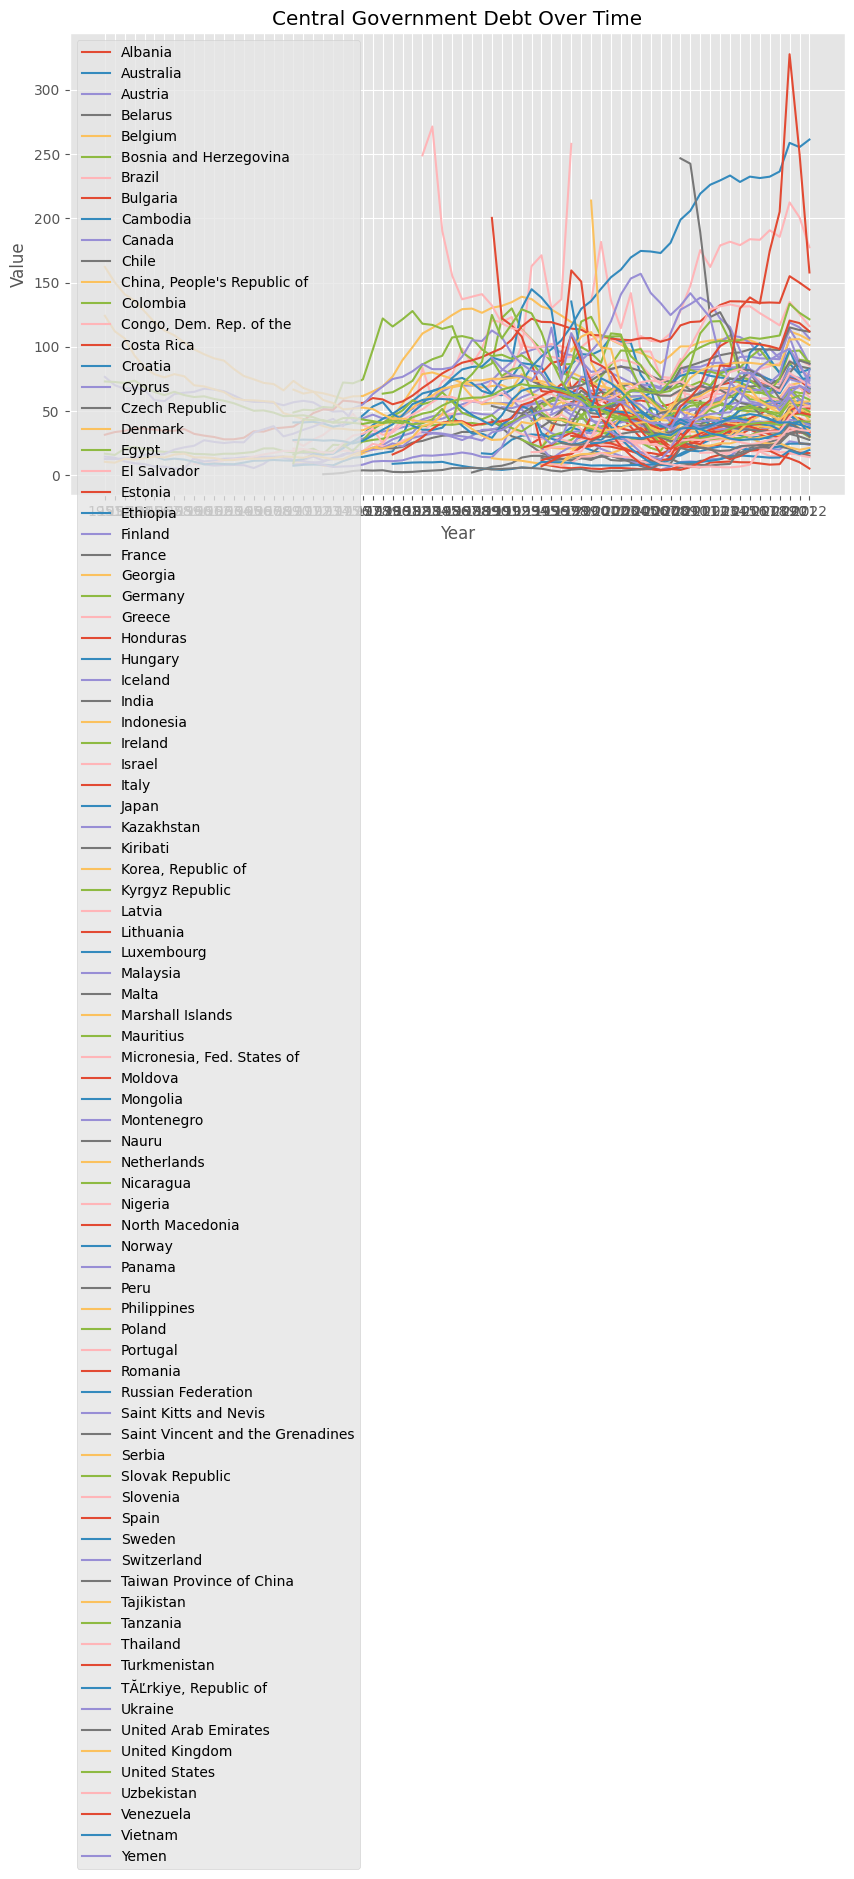

In [ ]:
result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'Year'}, inplace=True)

# Создание графика
plt.figure(figsize=(10, 6))
for column in result_df.columns[1:]:
    plt.plot(result_df['Year'], result_df[column], label=column)

plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Central Government Debt Over Time')
plt.legend()
plt.show()

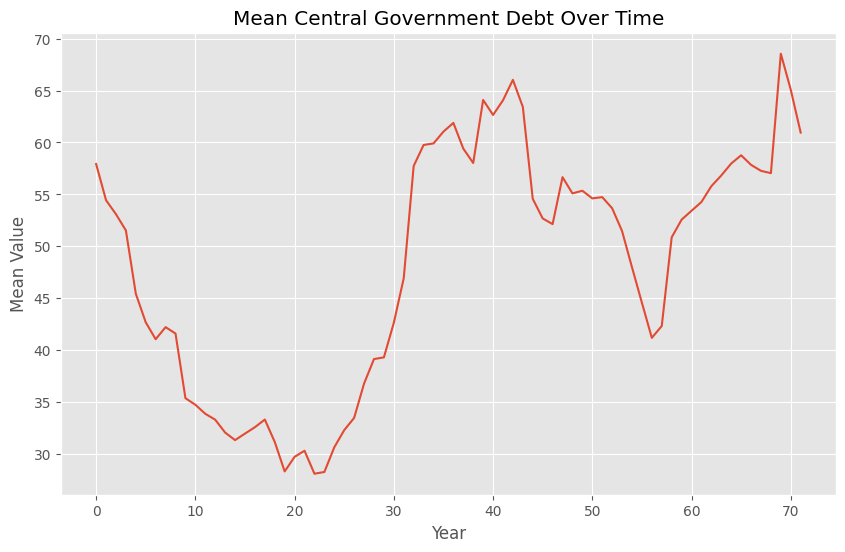

In [ ]:
mean_values = result_df.drop(columns=['Year']).mean(axis=1)

# Создание DataFrame из средних значений
mean_df = mean_values.to_frame().reset_index()
mean_df.rename(columns={'index': 'Year', 0: 'Mean Value'}, inplace=True)

# Создание графика
plt.figure(figsize=(10, 6))
plt.plot(mean_df['Year'], mean_df['Mean Value'])
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.title('Mean Central Government Debt Over Time')
plt.show()